In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN


In [58]:
df.shape

(11251, 15)

In [60]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [92]:
# Drop unrelated columns
df.drop(columns=['Status','unnamed1'],inplace=True)

In [94]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [96]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [100]:
# Drop null values 
df.dropna(inplace=True)

In [108]:
# convert datatype
df['Amount'].astype('int')

0        23952
1        23934
2        23924
3        23912
4        23877
         ...  
11246      370
11247      367
11248      213
11249      206
11250      188
Name: Amount, Length: 11239, dtype: int32

# Exploratory Data Analysis

In [ ]:
# Gender

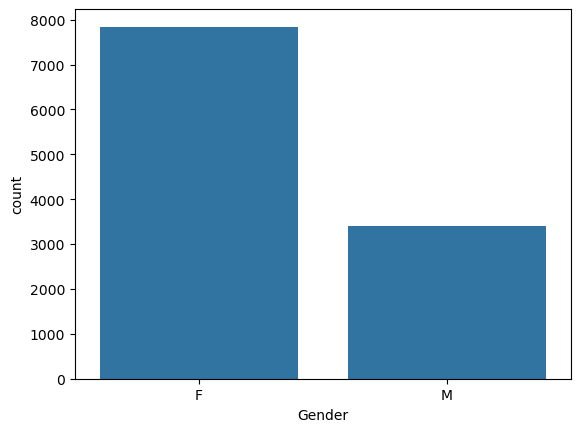

In [32]:
# plotting a bar chart for Gender and it's count

sns.countplot(x = 'Gender',data = df)
plt.show()

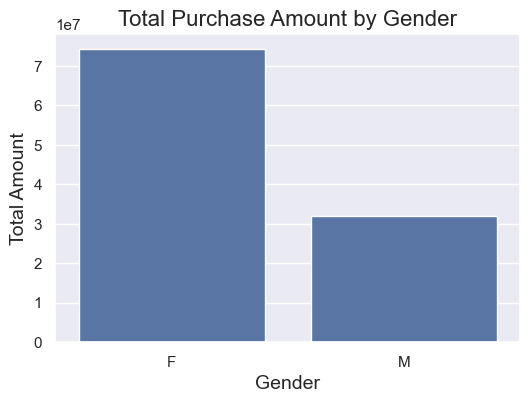

In [480]:
# Plot barchart for Gender category vs Total Amount

gender_sales = df.groupby('Gender')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_sales.index, y=gender_sales.values)
plt.title('Total Purchase Amount by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.show()

**From the above two plots,we can see that "Females" contribute more to the total purchase amount compared to males, highlighting their significant role in Diwali shopping**

In [ ]:
# Age Group

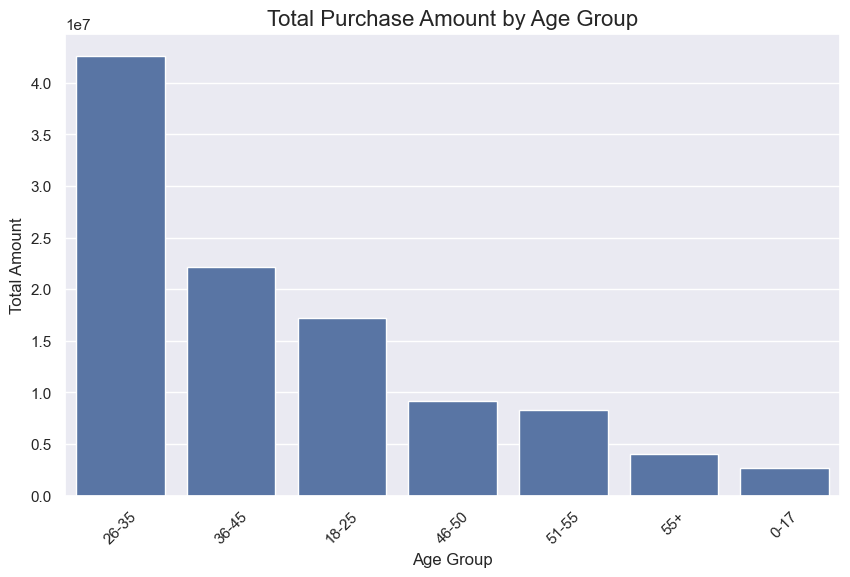

In [483]:
# plotting a barplot for Age Group vs Amount

age_sales=df.groupby('Age Group')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=age_sales.index, y=age_sales.values)
plt.title('Total Purchase Amount by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

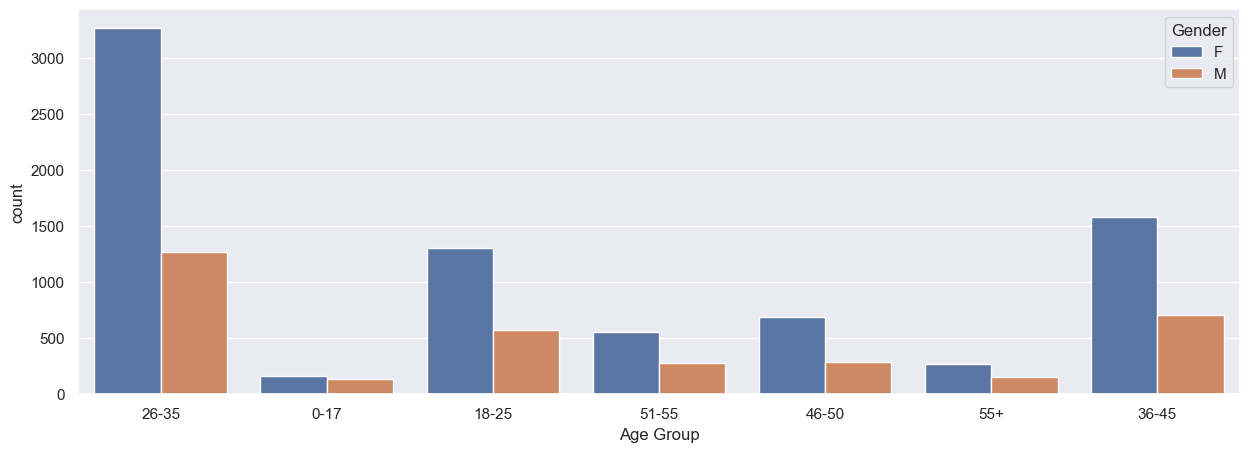

In [488]:
# Plotting Countplot for Age Group with Gender as hue

sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
plt.show()

**From the above plot,we can see that "26-35" age group has the highest purchase amount, indicating that this demographic is the most active during Diwali sales**

In [ ]:
# State

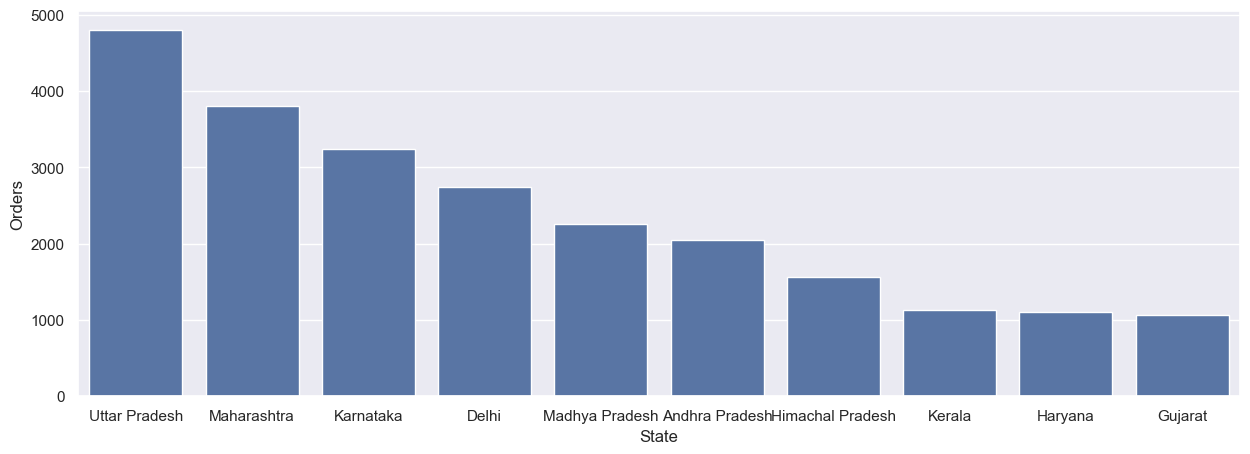

In [352]:
# total number of orders from top 10 states

sales_state = df.groupby('State')['Orders'].sum().sort_values( ascending=False).head(10)
sales_state=sales_state.reset_index()

plt.figure(figsize=(15,5))
sns.barplot(data = sales_state, x = 'State',y= 'Orders')
plt.show()

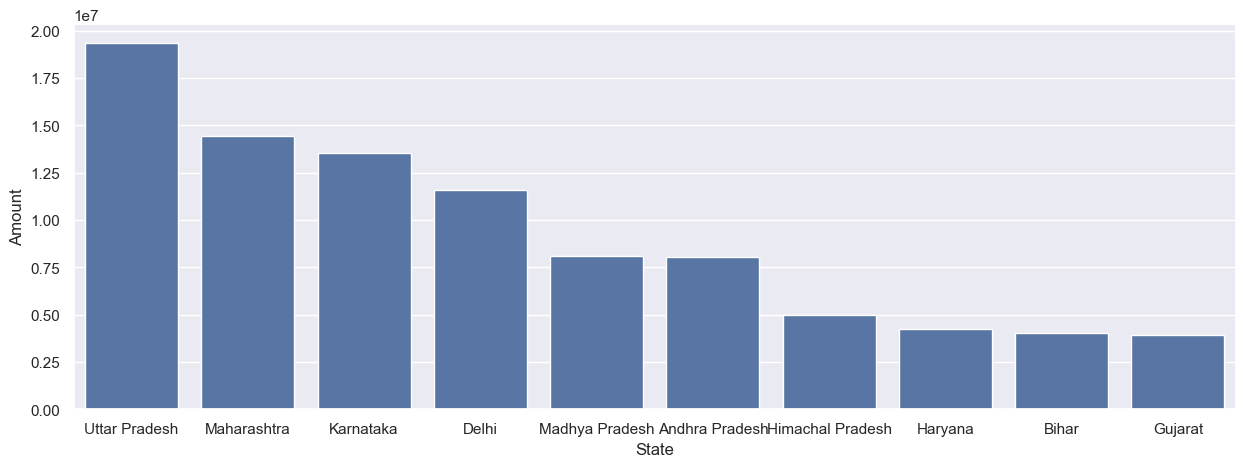

In [357]:
# total amount/sales from top 10 states

sales_state = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
sales_state=sales_state.reset_index()

plt.figure(figsize=(15,5))
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.show()

**From above two plots we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively**

In [ ]:
# Marital status

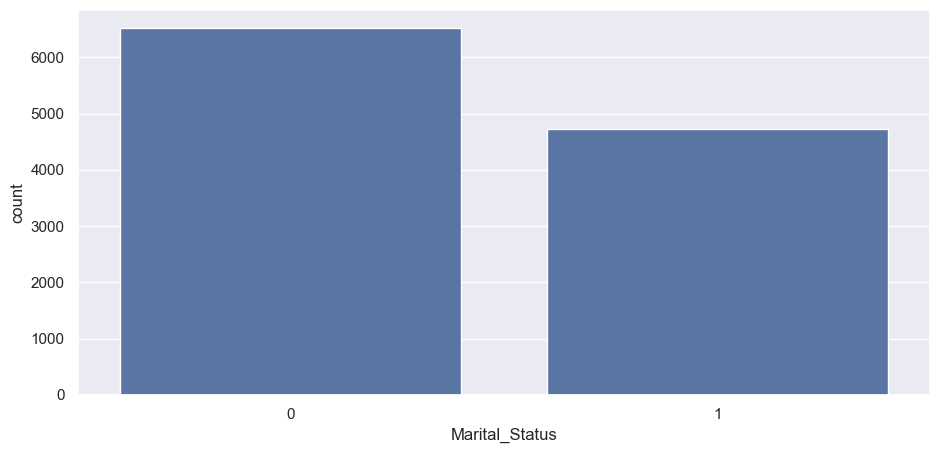

In [363]:
# plotting a countplor for Marital_Status

plt.figure(figsize=(11,5))
sns.countplot(data = df, x = 'Marital_Status')
plt.show()

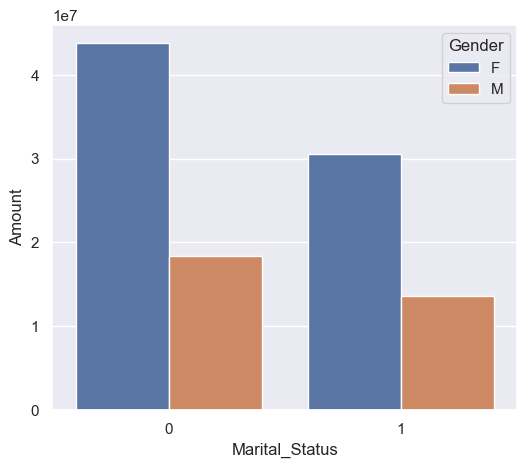

In [381]:
# Plotting sales by marital status and gender 

sales_status = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().sort_values( ascending=False)
sales_status=sales_status.reset_index()

plt.figure(figsize=(6,5))
sns.barplot(data = sales_status, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.show()

**From above two plots we can see that most of the buyers are married (women) and they have high purchasing power**

In [ ]:
# Occupation

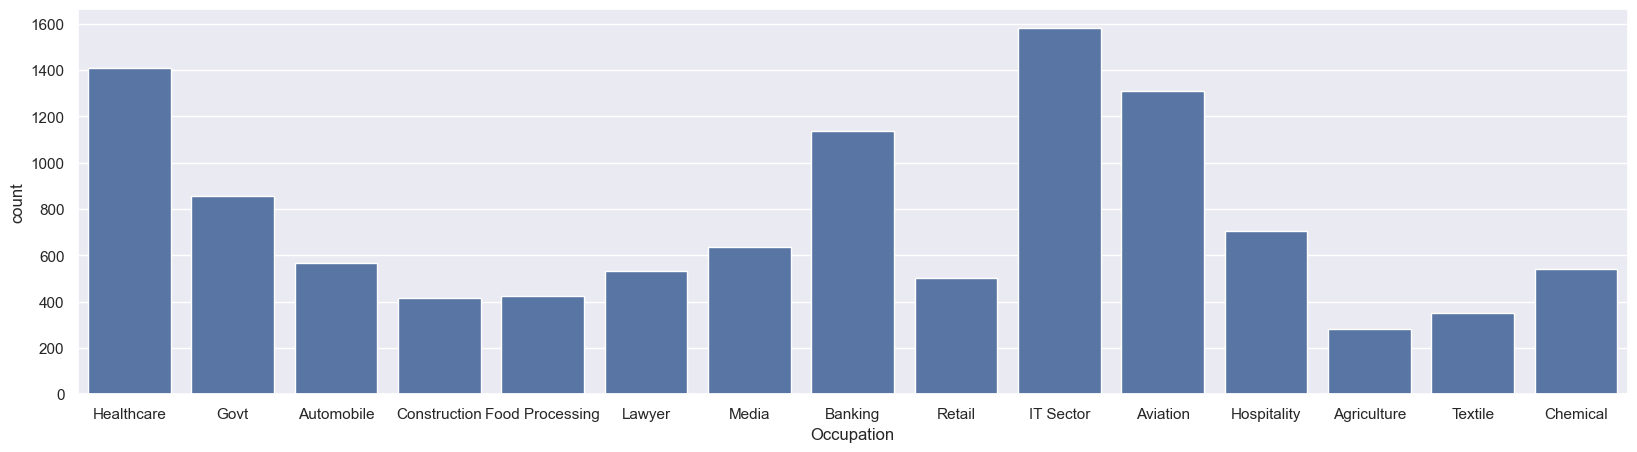

In [390]:
# plotting a countplot for occupation

plt.figure(figsize=(20,5))
sns.countplot(data = df, x = 'Occupation')
plt.show()

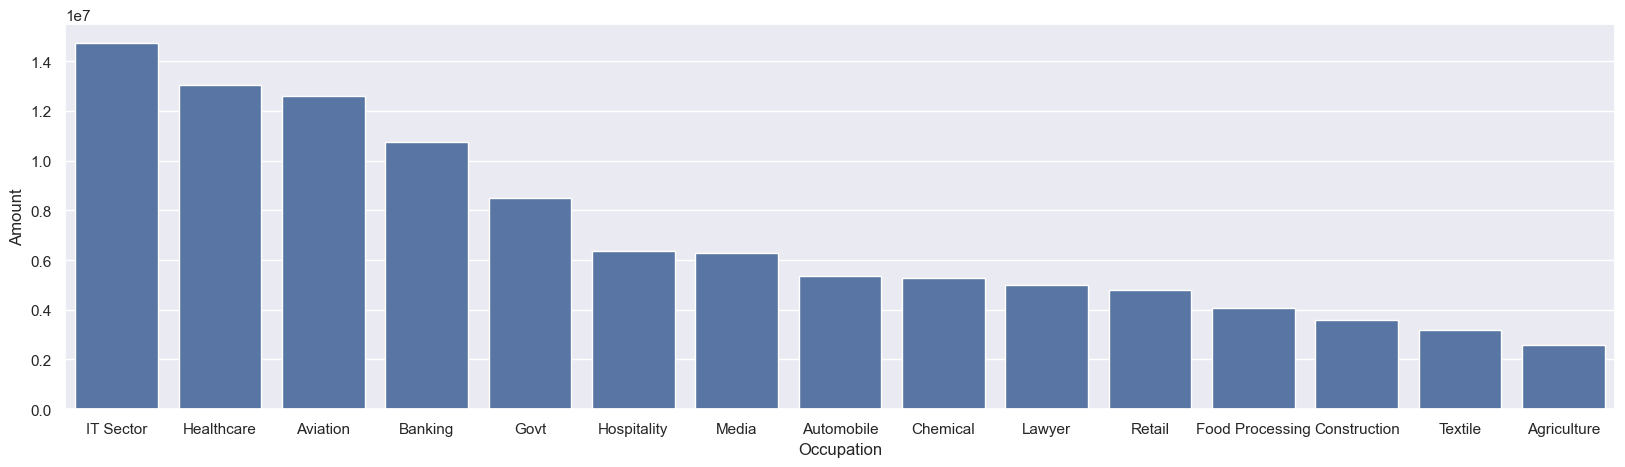

In [494]:
# plotting barplot for Occupation vs Amount

sales_status = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False)
sales_status=sales_status.reset_index()

plt.figure(figsize=(20,5))
sns.barplot(data = sales_status, x = 'Occupation',y='Amount')
plt.show()

**From above plots we can see that most of the buyers are working in IT, Healthcare and Aviation sector**

In [ ]:
# Product Category

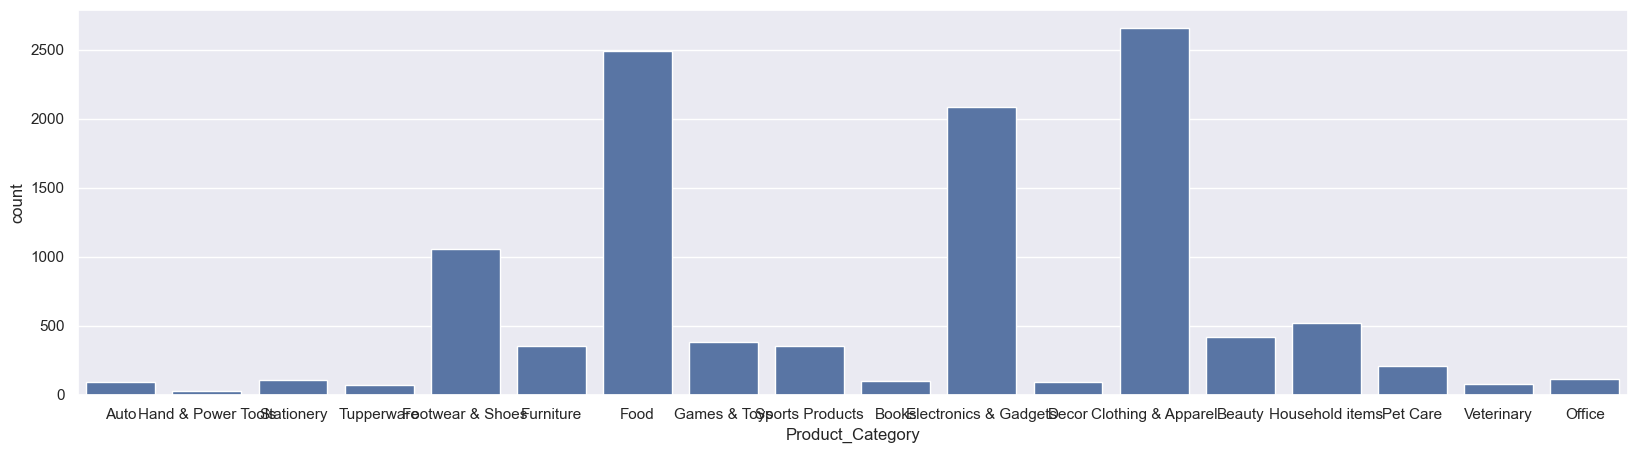

In [413]:
# Plotting a countplot for Product_Category

plt.figure(figsize=(20,5))
sns.countplot(data = df, x = 'Product_Category')
plt.show()

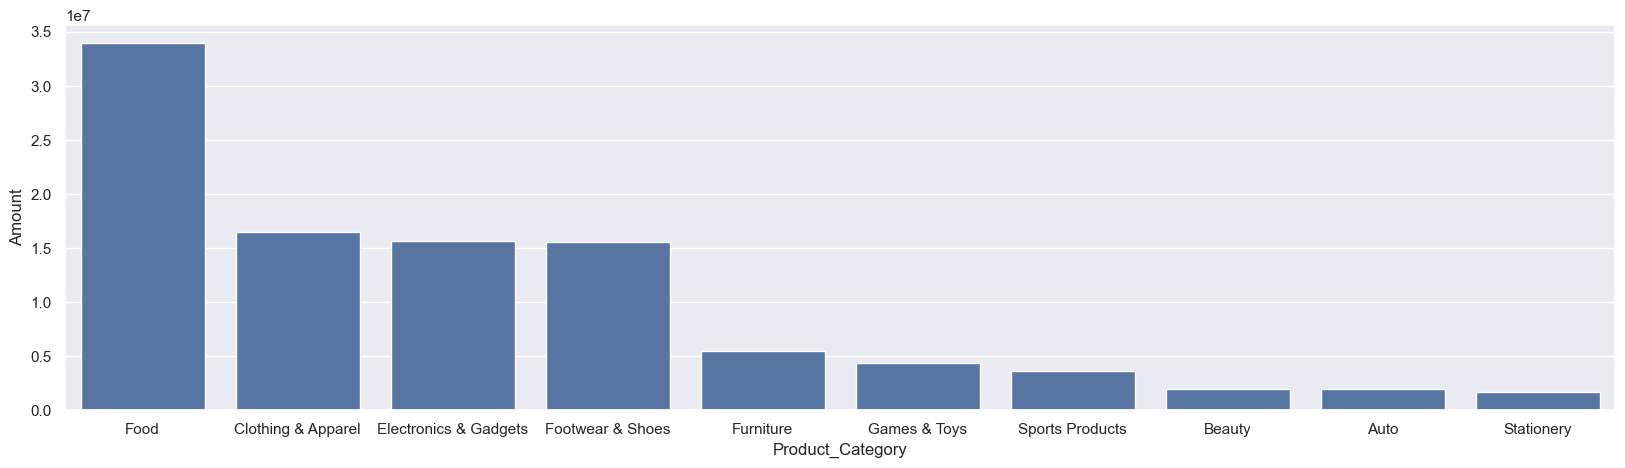

In [419]:
# plotting barplot for Product_Category vs Amount

sales_category=df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10)
sales_category=sales_category.reset_index()

plt.figure(figsize=(20,5))
sns.barplot(data = sales_category, x = 'Product_Category', y= 'Amount')
plt.show()

**From above two plots we can see that most of the sold products are from Food, Clothing and Electronics category**

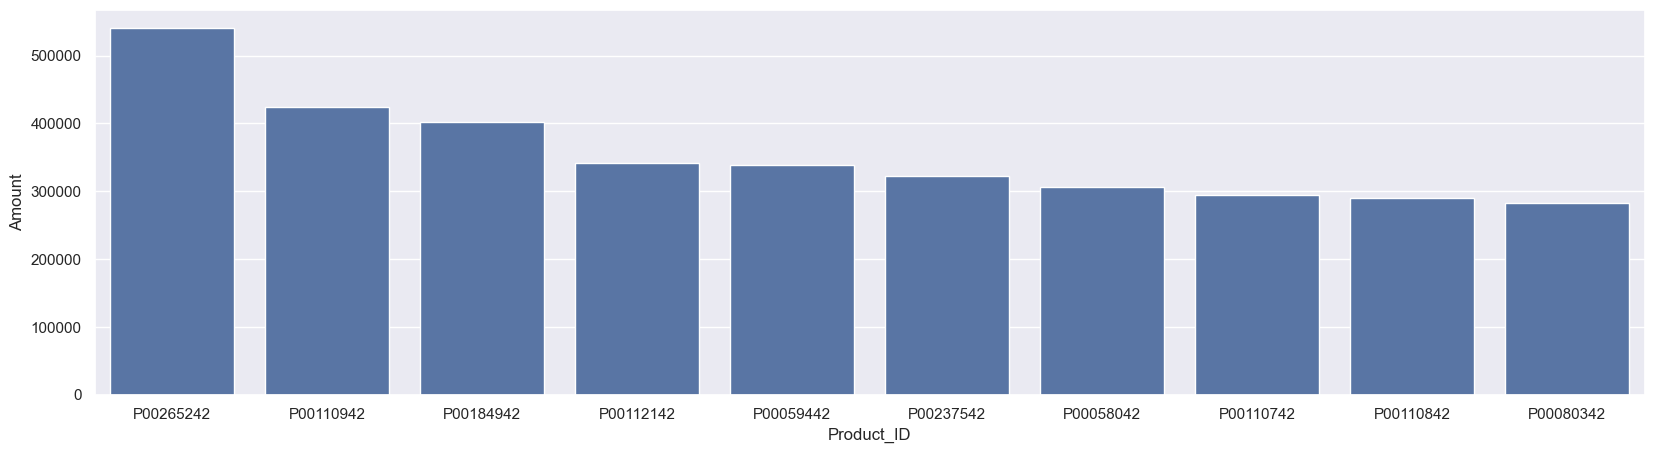

In [425]:
# plotting barplot for Product_Category vs Amount

sales_product=df.groupby('Product_ID')['Amount'].sum().sort_values(ascending=False).head(10)
sales_product=sales_product.reset_index()

plt.figure(figsize=(20,5))
sns.barplot(data = sales_product, x = 'Product_ID', y= 'Amount')
plt.show()

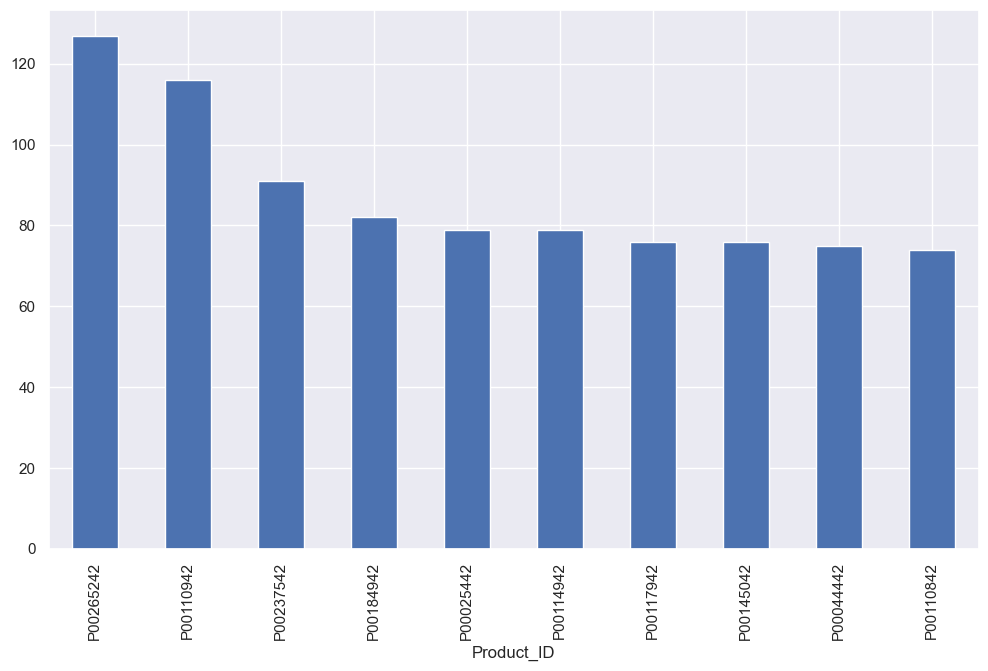

In [470]:
# top 10 most sold products

plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

# Conclusion: 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

In [510]:
plt.savefig('top_products_sales.png',format='png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1500x500 with 0 Axes>

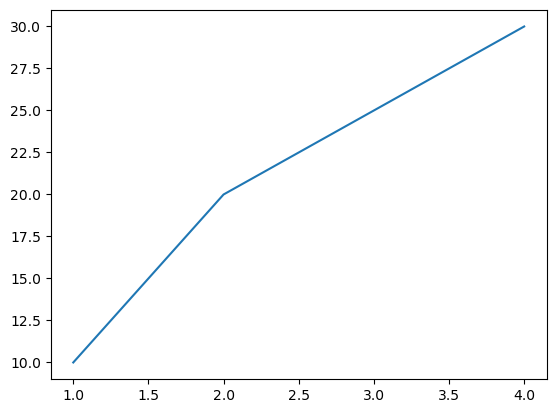

In [36]:
import matplotlib.pyplot as plt

# Sample plot
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

plt.plot(x, y)

# Save the figure
plt.savefig(r'C:\Users\raj kumar\aales_trends.png')

# Display the plot
plt.show()
